In [1]:
import sys,os,os.path

sys.path.append("../../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import tables as tb
import IC.invisible_cities.io.dst_io                           as     dstio
import IC.invisible_cities.io.mcinfo_io as mcio
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers
import iminuit,probfit

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

from next_misc.Tl_studies.functions import isaura_analyse as isa


#adding here ROI
emin = 1.55
emax = 1.65

In [2]:
# load in the relevant files
# currently only isaura q_thr3, q_cut3
qthr3_qcut3_f = f'/home/e78368jw/Documents/NEXT_CODE/next_misc/Tl_studies/soph-beer-isau/q_thr3/isaura/'
standard_f = f'/home/e78368jw/Documents/NEXT_CODE/next_misc/Tl_studies/soph-beer-isau/test_file/'



In [3]:
qthr_data = isa.load_tracks(qthr3_qcut3_f)
standard_data = isa.load_tracks(standard_f)

mc_qthr = (isa.load_MC(qthr3_qcut3_f))[1]
mc_standard = (isa.load_MC(standard_f))[1]


# double the MC IDs
mc_qthr = isa.double_event_id(mc_qthr)
mc_standard = isa.double_event_id(mc_standard)

File path incorrect, please state the correct file path
(but not any particular folder!)


UnboundLocalError: local variable 'file_names' referenced before assignment

In [26]:
display(qthr_data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,2140000,0,0.587368,110.523410,41,12941,1,-83.325,325.675,565.483826,...,616.874595,-27.015366,402.817515,571.256118,0.237331,0.190622,0.000000,14.000000,14.777778,14.668640
1,2140002,0,0.305654,28.285714,5,4121,3,285.675,225.675,337.647858,...,344.187019,304.425299,232.546713,344.323613,0.286822,0.285289,0.274049,14.111111,14.142857,13.771938
2,2140002,1,0.109662,14.111111,2,2261,3,341.675,221.675,422.679138,...,427.360509,359.162952,229.473591,427.840294,0.109662,0.109662,0.109662,14.111111,14.142857,13.771938
3,2140002,2,0.000878,0.000000,1,36,3,347.675,195.675,344.912964,...,344.912964,350.218580,199.086180,344.912964,0.000878,0.000878,0.000878,14.111111,14.142857,13.771938
4,2140004,0,0.636121,40.250233,13,10990,4,172.675,-237.325,1152.392944,...,1159.787176,181.332770,-216.594164,1172.450524,0.402075,0.335012,0.123888,14.772727,14.739130,14.616013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2140604,0,0.343772,38.981045,9,5939,2,400.675,96.675,641.056885,...,657.479444,433.543836,112.960609,649.264530,0.316229,0.235568,0.209105,14.533333,13.444444,14.342933
1694,2140604,1,0.164262,13.444444,2,2704,2,270.675,150.675,885.690308,...,891.540833,277.310375,168.086839,891.621803,0.164262,0.164262,0.164262,14.533333,13.444444,14.342933
1695,2140606,0,0.581062,90.811191,37,8923,3,-27.325,98.675,320.799469,...,338.742479,-4.358280,101.209319,323.476634,0.441024,0.017849,0.000000,14.689655,14.785714,14.884759
1696,2140606,1,0.116228,20.842344,4,2769,3,371.675,246.675,633.715332,...,640.956779,381.289836,257.303515,639.486322,0.116228,0.115647,0.115647,14.689655,14.785714,14.884759


In [27]:
display(standard_data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,2140000,0,0.372407,20.069022,4,3819,2,-73.325,335.675,609.555542,...,614.266241,-55.940976,352.794476,615.491918,0.372407,0.372407,0.372407,14.500000,13.875000,14.139633
1,2140000,1,0.214682,20.069022,3,2289,2,-44.325,391.675,565.483826,...,570.653922,-33.435651,408.056177,572.788616,0.214682,0.214534,0.214534,14.500000,13.875000,14.139633
2,2140002,0,0.306348,13.250000,2,2371,2,298.675,233.675,338.664673,...,344.127411,306.905525,248.676291,344.238850,0.306348,0.306348,0.306348,14.428571,13.250000,13.336578
3,2140002,1,0.109347,14.428571,2,1283,2,342.675,220.675,422.679138,...,427.594535,359.303420,228.588233,427.626138,0.109347,0.109347,0.109347,14.428571,13.250000,13.336578
4,2140004,0,0.635120,40.845199,11,5574,3,175.675,-228.325,1152.392944,...,1158.651055,181.807584,-217.187999,1171.397103,0.528419,0.415528,0.309729,14.975610,14.928571,14.903171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2140604,0,0.342332,19.623009,4,3657,2,407.675,101.675,643.156006,...,652.149025,426.388756,118.236948,650.029900,0.341357,0.339565,0.338602,14.000000,13.750000,14.942674
593,2140604,1,0.164109,19.623009,3,1945,2,266.675,156.675,886.733643,...,890.558759,282.149188,163.539989,891.130280,0.164109,0.164109,0.164109,14.000000,13.750000,14.942674
594,2140606,0,0.571920,40.297179,11,6033,3,-2.325,143.675,327.087097,...,334.155024,8.843617,150.554088,345.966595,0.495121,0.089337,0.025625,14.620690,14.833333,14.649747
595,2140606,1,0.114123,20.827682,3,1415,3,375.675,247.675,635.791504,...,640.345831,381.006848,266.659827,643.299075,0.114082,0.113743,0.113702,14.620690,14.833333,14.649747


In [28]:
display(mc_qthr)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2140000,1,Tl208,True,0,396.790497,394.893799,534.197815,0.000000,396.790497,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,none,RadioactiveDecay
1,2140000,4,e-,False,1,396.790497,394.893799,534.197815,0.000252,397.164062,...,0.064030,0.672057,0.467528,-0.00000,-0.000000,-0.000000,0.456194,6.377854e+00,RadioactiveDecay,eIoni
2,2140000,3,anti_nu_e,False,1,396.790497,394.893799,534.197815,0.000252,-12500.000000,...,-0.635320,0.301113,-0.449045,-0.63532,0.301113,-0.449045,0.834231,1.693463e+04,RadioactiveDecay,Transportation
3,2140000,2,Pb208[3708.451],False,1,396.790497,394.893799,534.197815,0.000252,396.790497,...,0.571290,-0.973170,-0.018483,0.00000,-0.000000,-0.000000,0.000003,0.000000e+00,RadioactiveDecay,RadioactiveDecay
4,2140000,6,gamma,False,2,396.790497,394.893799,534.197815,0.000252,421.420502,...,0.293844,-0.391504,0.145723,0.00000,0.000000,-0.000000,0.510739,4.438209e+01,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49269,2140606,59,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.308990,...,-0.007326,0.001855,0.001558,-0.00000,0.000000,0.000000,0.000058,1.450558e-07,compt,msc
49270,2140606,58,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.308990,...,0.003614,-0.001895,-0.009471,0.00000,-0.000000,-0.000000,0.000104,1.909612e-07,compt,msc
49271,2140606,57,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.308990,...,-0.024729,0.005926,-0.016144,0.00000,-0.000000,-0.000000,0.000887,1.588500e-05,compt,eIoni
49272,2140606,56,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.108704,...,-1.352777,-0.430244,1.009426,0.00000,-0.000000,-0.000000,1.304264,6.869801e-01,compt,eIoni


In [29]:
display(mc_standard)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2140000,1,Tl208,True,0,396.790497,394.893799,534.197815,0.000000,396.790497,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,none,RadioactiveDecay
1,2140000,4,e-,False,1,396.790497,394.893799,534.197815,0.000252,397.164062,...,0.064030,0.672057,0.467528,-0.00000,-0.000000,-0.000000,0.456194,6.377854e+00,RadioactiveDecay,eIoni
2,2140000,3,anti_nu_e,False,1,396.790497,394.893799,534.197815,0.000252,-12500.000000,...,-0.635320,0.301113,-0.449045,-0.63532,0.301113,-0.449045,0.834231,1.693463e+04,RadioactiveDecay,Transportation
3,2140000,2,Pb208[3708.451],False,1,396.790497,394.893799,534.197815,0.000252,396.790497,...,0.571290,-0.973170,-0.018483,0.00000,-0.000000,-0.000000,0.000003,0.000000e+00,RadioactiveDecay,RadioactiveDecay
4,2140000,6,gamma,False,2,396.790497,394.893799,534.197815,0.000252,421.420502,...,0.293844,-0.391504,0.145723,0.00000,0.000000,-0.000000,0.510739,4.438209e+01,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24632,2140606,59,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.308990,...,-0.007326,0.001855,0.001558,-0.00000,0.000000,0.000000,0.000058,1.450558e-07,compt,msc
24633,2140606,58,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.308990,...,0.003614,-0.001895,-0.009471,0.00000,-0.000000,-0.000000,0.000104,1.909612e-07,compt,msc
24634,2140606,57,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.308990,...,-0.024729,0.005926,-0.016144,0.00000,-0.000000,-0.000000,0.000887,1.588500e-05,compt,eIoni
24635,2140606,56,e-,False,55,365.308990,364.810852,578.610596,0.214061,365.108704,...,-1.352777,-0.430244,1.009426,0.00000,-0.000000,-0.000000,1.304264,6.869801e-01,compt,eIoni


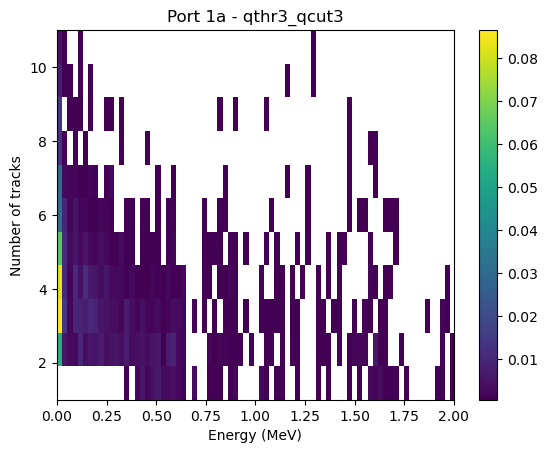

In [30]:
def get_weights(data, norm):
    if norm:
        return np.repeat(1.0/len(data), len(data))
    else:
        return np.repeat(1.0, len(data))

track_energy = qthr_data.energy
track_no = qthr_data.numb_of_tracks
# normalise
weights = get_weights(track_energy, True)
#plt.hist2d(track_energy, track_no, bins=(50, 20), cmin=0.001)
plt.hist2d(track_energy, track_no, weights = weights, bins=(100, 11), cmin=0.0005)
plt.xlim([0,2])
plt.title("Port 1a - qthr3_qcut3")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of tracks')
plt.colorbar()
plt.show()

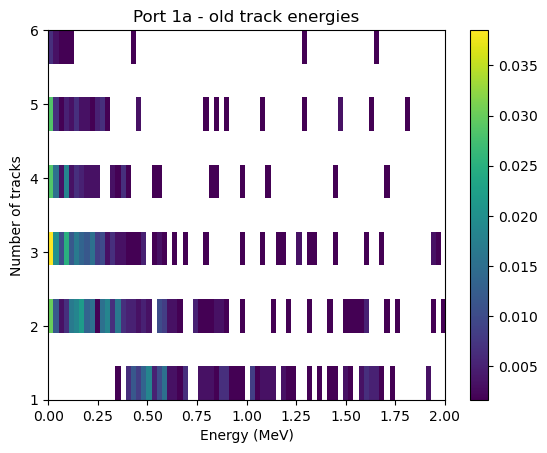

In [31]:
track_energy = standard_data.energy
track_no = standard_data.numb_of_tracks
# normalise
weights = get_weights(track_energy, True)
#plt.hist2d(track_energy, track_no, bins=(50, 20), cmin=0.001)
plt.hist2d(track_energy, track_no, weights = weights, bins=(100, 11), cmin=0.0005)
plt.xlim([0,2])
plt.title("Port 1a - old track energies")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of tracks')
plt.colorbar()
plt.show()

In [39]:
# check number of broken tracks wrt positron events (true information) for both
standard_posi = (isa.positron_scraper(mc_standard))['event_id'].to_numpy()
qthr_posi = (isa.positron_scraper(mc_qthr))['event_id'].to_numpy()

In [40]:
display(standard_posi)
#display(qthr_posi)

array([2140004, 2140012, 2140048, 2140058, 2140060, 2140102, 2140114,
       2140118, 2140122, 2140136, 2140138, 2140140, 2140170, 2140178,
       2140182, 2140188, 2140194, 2140208, 2140216, 2140228, 2140242,
       2140246, 2140256, 2140258, 2140262, 2140280, 2140284, 2140290,
       2140306, 2140310, 2140332, 2140340, 2140352, 2140354, 2140358,
       2140372, 2140380, 2140384, 2140396, 2140402, 2140416, 2140424,
       2140446, 2140452, 2140466, 2140474, 2140476, 2140484, 2140492,
       2140504, 2140510, 2140542, 2140548, 2140552])

In [44]:
# collect the positron tracks
qthr_signals = qthr_data[qthr_data['event'].isin(qthr_posi)]
standard_signals = standard_data[standard_data['event'].isin(standard_posi)]

display(qthr_signals)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
4,2140004,0,0.636121,40.250233,13,10990,4,172.675,-237.325,1152.392944,...,1159.787176,181.332770,-216.594164,1172.450524,0.402075,0.335012,0.123888,14.772727,14.739130,14.616013
5,2140004,1,0.266090,35.640776,8,6928,4,408.675,9.675,1104.100708,...,1113.007943,419.482370,27.597965,1114.766796,0.219333,0.163707,0.124008,14.772727,14.739130,14.616013
6,2140004,2,0.139380,20.868048,4,3097,4,-152.325,363.675,641.039551,...,650.128097,-134.600651,373.623893,647.073863,0.139166,0.139139,0.138926,14.772727,14.739130,14.616013
7,2140004,3,0.000328,14.739130,2,12,4,130.675,-242.325,1190.142944,...,1190.142944,132.442576,-239.926856,1190.142944,0.000328,0.000328,0.000328,14.772727,14.739130,14.616013
14,2140012,0,1.540488,162.799001,59,10789,2,386.675,39.675,451.022980,...,484.812948,429.568617,49.241007,471.432408,0.125409,0.093287,0.000000,15.000000,14.545455,14.689371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,2140548,1,0.024083,0.000000,1,196,4,181.675,380.675,497.163116,...,498.132907,183.187455,383.148559,498.132907,0.024083,0.024083,0.024083,13.285714,14.769231,13.750723
1628,2140548,2,0.000656,0.000000,1,8,4,150.675,58.675,532.896973,...,532.896973,152.180406,59.182390,532.896973,0.000656,0.000656,0.000656,13.285714,14.769231,13.750723
1629,2140548,3,0.000076,0.000000,1,1,4,216.675,101.675,618.957153,...,618.957153,216.675000,101.675000,618.957153,0.000076,0.000076,0.000076,13.285714,14.769231,13.750723
1632,2140552,0,0.346995,24.077340,7,5113,2,86.675,172.675,342.899139,...,351.102245,106.988383,189.289155,361.430011,0.344027,0.339178,0.336388,14.727273,14.312500,12.568933


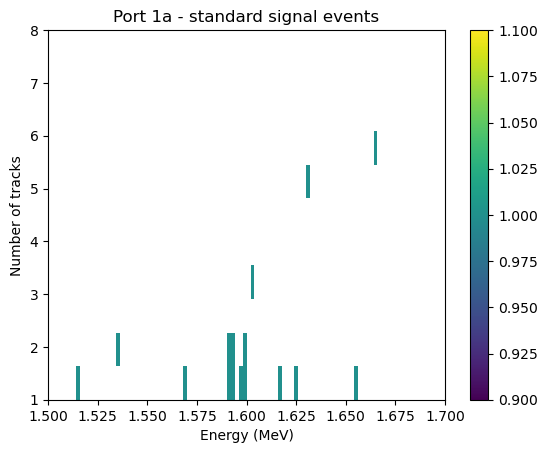

In [60]:
# plot number of tracks per signal events

track_energy = standard_signals.energy
track_no = standard_signals.numb_of_tracks
# normalise
weights = get_weights(track_energy, True)
#plt.hist2d(track_energy, track_no, bins=(50, 20), cmin=0.001)
plt.hist2d(track_energy, track_no, range = ([1.5,1.7],[1,8]), bins=(100, 11), cmin=0.0005)
plt.xlim([1.5,1.7])
plt.title("Port 1a - standard signal events")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of tracks')
plt.colorbar()
plt.show()

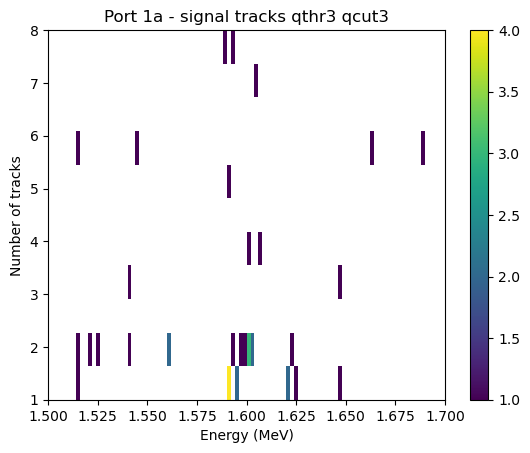

In [59]:
track_energy = qthr_signals.energy
track_no = qthr_signals.numb_of_tracks
# normalise
weights = get_weights(track_energy, True)
#plt.hist2d(track_energy, track_no, bins=(50, 20), cmin=0.001)
plt.hist2d(track_energy, track_no, range = ([1.5,1.7],[1,8]), bins=(100, 11), cmin=0.0005)
plt.xlim([1.5,1.7])
plt.title("Port 1a - signal tracks qthr3 qcut3")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of tracks')
plt.colorbar()
plt.show()

In [68]:
condition = (qthr_signals['energy'] <= 1.7) & (qthr_signals['energy'] >= 1.5) & (qthr_signals['numb_of_tracks'] == 1)
display(qthr_signals[condition])

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
206,2140140,0,1.590779,113.313000,57,10983,1,-45.325,293.675,1038.997681,...,1048.580677,-23.735526,369.795071,1130.064143,0.629473,0.395563,0.0,12.000000,14.333333,14.392299
424,2140280,0,1.647482,199.355361,93,10439,1,302.675,-335.325,564.425049,...,614.263044,358.738306,-309.093963,648.481542,0.115800,0.112705,0.0,12.833333,13.700000,13.785139
559,2140380,0,1.590782,141.435285,67,10889,1,101.675,-119.325,875.192444,...,884.197900,158.958354,-83.989976,966.082856,0.540525,0.516655,0.0,13.800000,13.625000,14.390930
564,2140384,0,1.594252,213.226161,79,10483,1,-230.325,-22.325,1048.438232,...,1074.024524,-154.123188,130.312715,1060.721280,0.492198,0.466811,0.0,14.833333,14.833333,14.992031
701,2140466,0,1.624074,126.500767,53,11955,1,270.675,198.675,391.143555,...,406.647121,280.959239,222.943919,434.102398,0.690665,0.403092,0.0,14.875000,13.200000,11.790779
712,2140474,0,1.515515,203.946169,66,11352,1,176.675,321.675,476.220459,...,483.427782,292.314172,372.417183,559.404001,0.482661,0.077659,0.0,13.800000,14.333333,14.231070
818,2140542,0,1.621927,89.290576,60,8822,1,387.675,0.675,960.233826,...,1016.894479,447.947370,55.544358,965.305231,0.320206,0.114937,0.0,14.200000,13.200000,13.004504
1102,2140140,0,1.590779,122.191556,56,13402,1,-49.325,294.675,1038.997681,...,1127.876158,-14.131565,303.809645,1066.250172,0.345017,0.200869,0.0,13.000000,14.333333,14.392299
1417,2140380,0,1.590782,142.815678,69,12624,1,100.675,-110.325,875.192444,...,884.295907,150.848124,-79.473250,966.857080,0.545371,0.511697,0.0,13.800000,14.285714,14.390930
1421,2140384,0,1.594252,198.642936,86,13891,1,-235.325,-20.325,1048.438232,...,1074.321302,-167.682843,148.391302,1064.845377,0.512398,0.219886,0.0,15.000000,14.923077,14.992031


In [4]:
# print number of unbroken tracks per database
def print_one_tracks(df, range):
    '''
    prints the number of 1-track events in the region of interest
    df -> pandas dataframe with 'energy' column
    range -> tuple
    '''

    condition = (df['energy'] <= 1.7) & (df['energy'] >= 1.5) & (df['numb_of_tracks'] == 1)
    how_many_tracks = df[condition]

    print("{} 1-tracks within region {} & {}".format(how_many_tracks.shape[0], range[0], range[1]))


    

In [72]:
print("q_cut3 , q_thr3")
print_one_tracks(qthr_signals, [1.5,1.7])
print("Initial parameters")
print_one_tracks(standard_signals, [1.5,1.7])

q_cut3 , q_thr3
11 1-tracks within region 1.5 & 1.7
Initial parameters
9 1-tracks within region 1.5 & 1.7


In [5]:
def plot_tracks_E(df, title = 'signal events', ranger = ([1.5,1.7], [1,8])):
    track_energy = df.energy
    track_no = df.numb_of_tracks
    # normalise

    plt.hist2d(track_energy, track_no, range = ranger, bins=(100, (ranger[1])[1]), cmin=0.0005)
    plt.xlim(ranger[0])
    plt.title(title)
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Number of tracks')
    plt.colorbar()
    plt.show()


def screen_data(file_path, low_E = False, plot = False, tit = "signal events"):
    '''
    screens the relevant information from this notebook
    this function assumes that MC event_id = tracks event/2

    low_E flag applies satellite track merging
    '''

    # open MC and tracks
    tracks = isa.load_tracks(file_path)

    mc = isa.double_event_id((isa.load_MC(file_path))[1])

    if (low_E == True):
        tracks = isa.remove_low_E_events(tracks, energy_limit = 0.05)


    # take positrons
    positrons = (isa.positron_scraper(mc))['event_id'].to_numpy()

    # collect positron events only
    signals = tracks[tracks['event'].isin(positrons)]

    # say how many events there are in the region of interest that are only 1-track
    print_one_tracks(signals, ([1.5,1.7]))


    # optional, plot the number of tracks vs energy across region of interest
    if (plot == True):
        plot_tracks_E(signals, title = tit)

    

In [124]:
# run the functions
screen_data(qthr3_qcut3_f, plot = True)

File path incorrect, please state the correct file path
(but not any particular folder!)


UnboundLocalError: local variable 'file_names' referenced before assignment

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


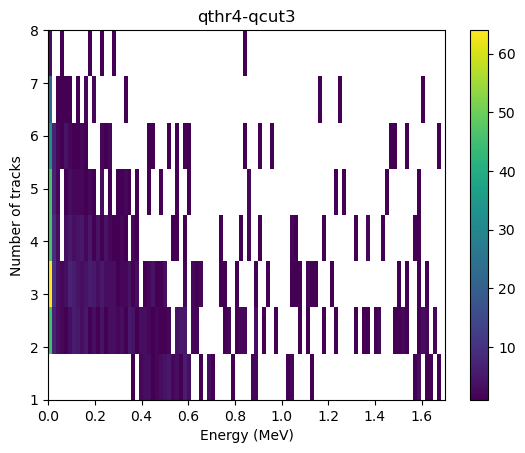

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
5 1-tracks within region 1.5 & 1.7


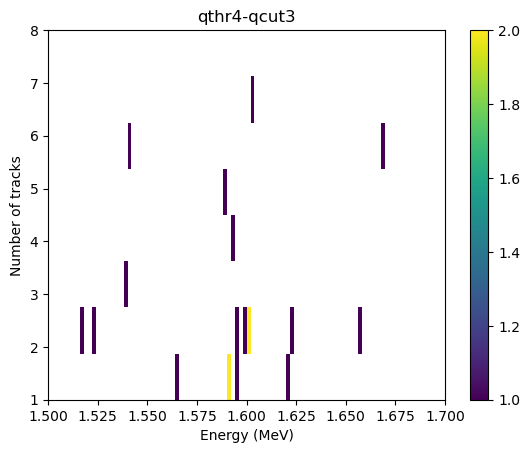

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


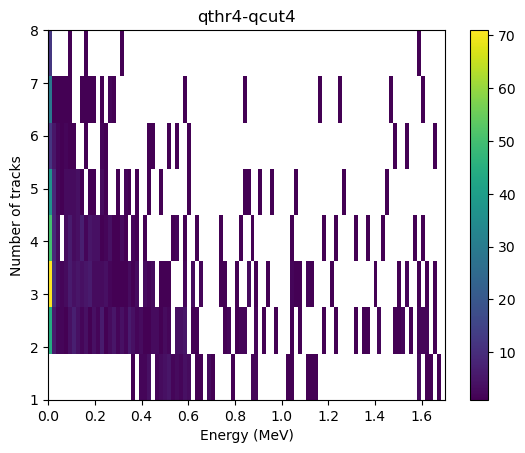

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
4 1-tracks within region 1.5 & 1.7


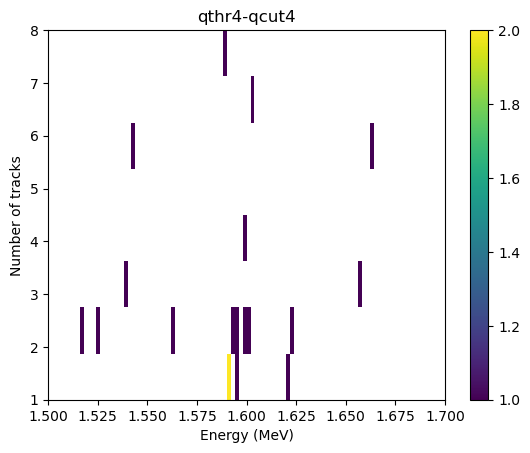

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


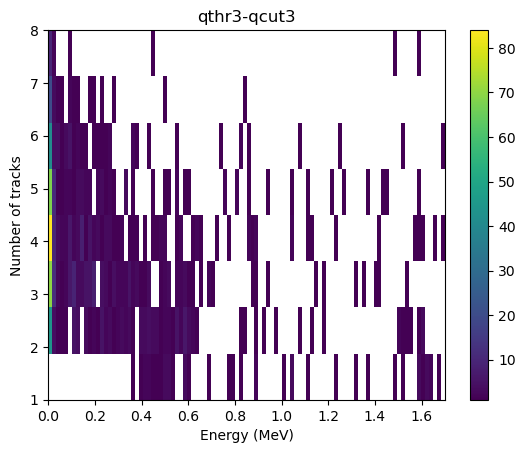

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
7 1-tracks within region 1.5 & 1.7


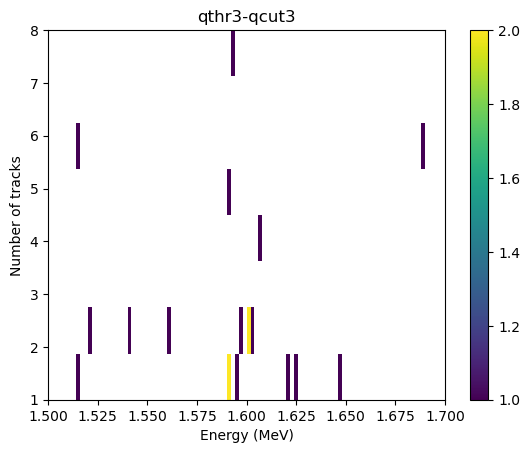

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


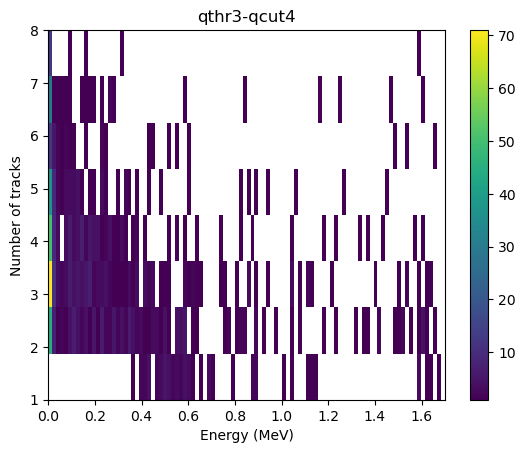

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
4 1-tracks within region 1.5 & 1.7


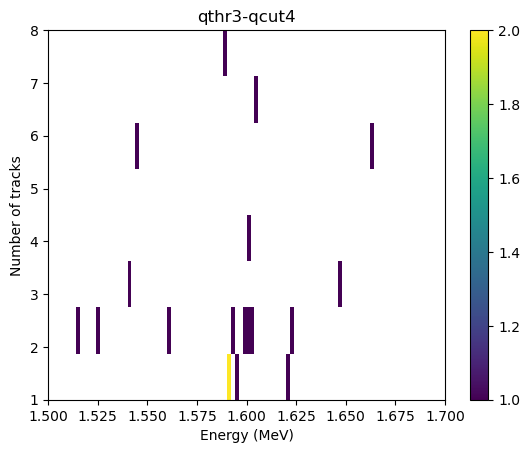

In [6]:
# do this for all q_cuts, all q_thr
cut_array = ['qthr4-qcut3',
             'qthr4-qcut4',
             'qthr3-qcut3',
             'qthr3-qcut4']

file_array = ['../soph-beer-isau/q_thr4/q_cut3/',
              '../soph-beer-isau/q_thr4/q_cut4/',
              '../soph-beer-isau/q_thr3/q_cut3/',
              '../soph-beer-isau/q_thr3/q_cut4/']

for i in range(len(file_array)):
    
    # plot first
    df = isa.load_tracks(file_array[i])
    plot_tracks_E(df, title = str(cut_array[i]), ranger = ([0,1.7], [1,8]))

    screen_data(file_array[i], plot = True, tit = cut_array[i])

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
9 1-tracks within region 1.5 & 1.7


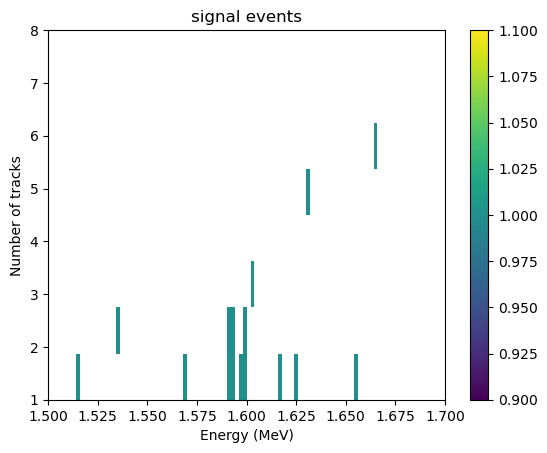

In [7]:
# compare to initial data
standard_f = '../soph-beer-isau/test_file/'

screen_data(standard_f, low_E = True, plot = True)

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


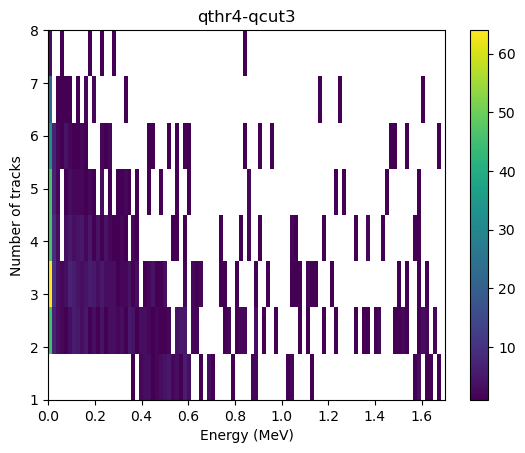

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
14 1-tracks within region 1.5 & 1.7


/home/e78368jw/Documents/NEXT_CODE/next_misc/Tl_studies/quick_notebooks/../../../next_misc/Tl_studies/functions/isaura_analyse.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


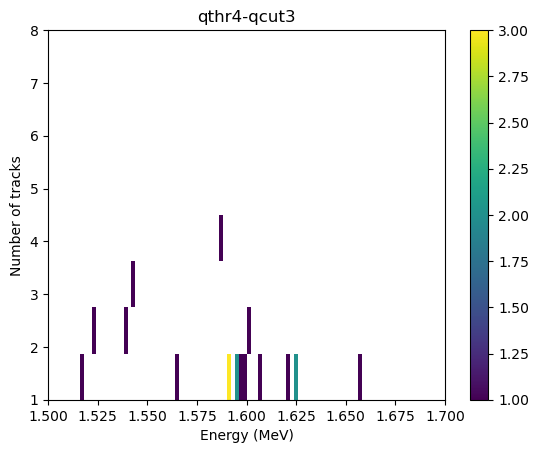

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


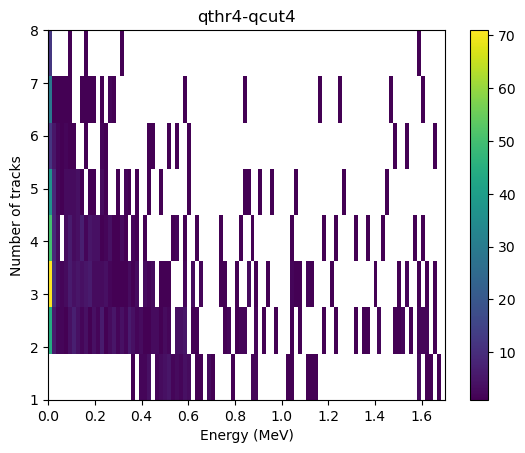

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
14 1-tracks within region 1.5 & 1.7


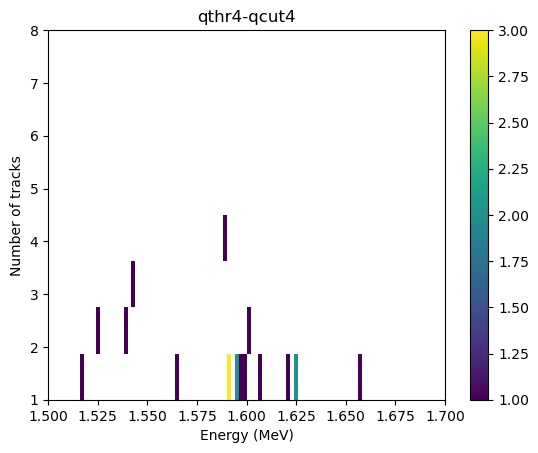

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


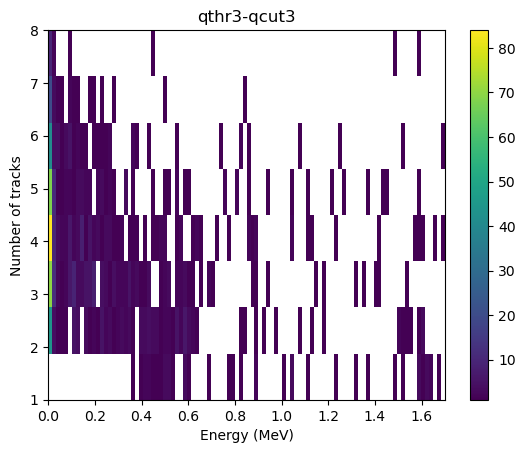

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
14 1-tracks within region 1.5 & 1.7


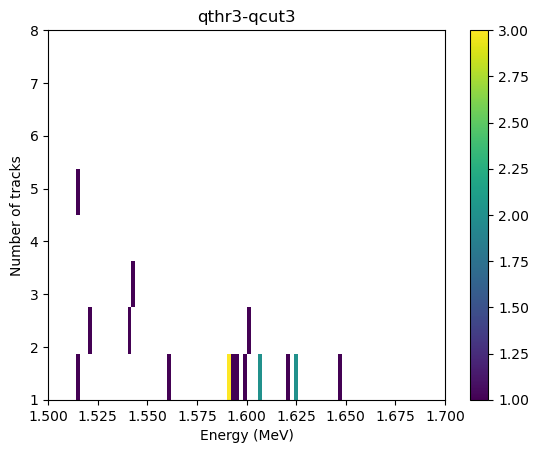

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


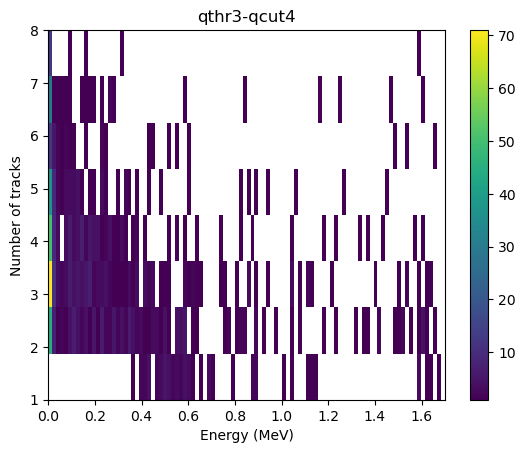

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
14 1-tracks within region 1.5 & 1.7


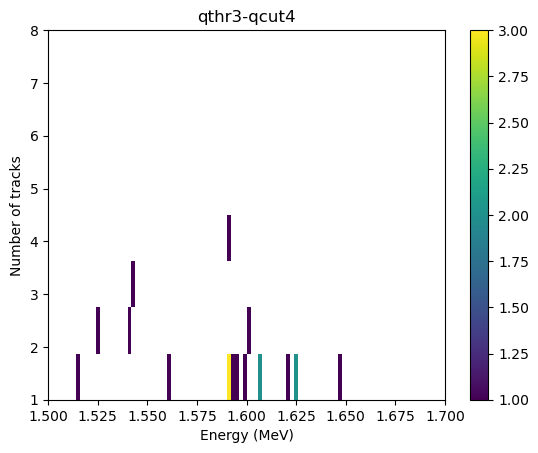

In [127]:
# add satellite track removal here
for i in range(len(file_array)):
    
    # plot first
    df = isa.load_tracks(file_array[i])
    plot_tracks_E(df, title = str(cut_array[i]), ranger = ([0,1.7], [1,8]))

    screen_data(file_array[i], low_E = True, plot = True, tit = cut_array[i])

### what if you run the satellite track remover on the initial data?